> In this notebook, we evaluate the models' performance based on the results we obtained through the following Git Repository :  [combining-evolutionary-and-assay-labelled-data](https://github.com/chloechsu/combining-evolutionary-and-assay-labelled-data).

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from helpers import*

### 1. Results Loading

In [4]:
RESULTS = 'results/demo/'  # Ajust to your own results path

#### 1.1 Simple linear model without evolutionary data

In [5]:
non_augmented_linear = pd.read_csv(RESULTS + 'non_augmented_linear_model.csv')
non_augmented_linear.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,0,240,0.6010,0.6010,0.4917,0.4917,96,-0.3966,-0.3966
1,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,1,240,0.6062,0.6062,0.4932,0.4932,96,-0.3646,-0.3646
2,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,2,240,0.5948,0.5948,0.4835,0.4835,96,-0.3440,-0.3440
3,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,3,240,0.6101,0.6101,0.4385,0.4385,96,-0.2888,-0.2888
4,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,4,240,0.6077,0.6077,0.4747,0.4747,96,-0.2830,-0.2830


#### Simple linear model without evolutionary data, 28 training points


In [6]:
non_augmented_linear28 = pd.read_csv(RESULTS + 'non_augmented_linear_model28.csv')
non_augmented_linear28.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,0,28,0.2693,0.2693,0.1513,0.1513,96,-1.0159,-1.0159
1,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,1,28,0.2342,0.2342,0.1554,0.1554,96,-1.1970,-1.1970
2,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,2,28,0.1590,0.1590,0.1190,0.1190,96,-0.9061,-0.9061
3,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,3,28,0.2579,0.2579,0.2085,0.2085,96,-0.8903,-0.8903
4,BLAT_ECOLX_Ranganathan2015-2500,onehot,NaN,4,28,0.3243,0.3243,0.2051,0.2051,96,-0.9392,-0.9392


#### Simple linear model without evolutionary data, subsample 35, 28 training points

In [7]:
non_augmented_linear35 = pd.read_csv(RESULTS + 'non_augmented_linear_model35.csv')
non_augmented_linear35.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,35BLAT,onehot,NaN,0,28,0.4218,0.4218,0.2041,0.2041,96,-0.5624,-0.5624
1,35BLAT,onehot,NaN,1,28,-0.1292,-0.1292,0.0000,0.0000,96,-1.0740,-1.0740
2,35BLAT,onehot,NaN,2,28,0.0000,0.0000,0.0000,0.0000,96,-1.0398,-1.0398
3,35BLAT,onehot,NaN,3,28,0.7595,0.7595,0.0000,0.0000,96,-0.6534,-0.6534
4,35BLAT,onehot,NaN,4,28,0.0000,0.0000,0.0000,0.0000,96,-0.5162,-0.5162


#### 1.2 EV Potts

In [8]:
ev_msa_only = pd.read_csv(RESULTS + 'ev.csv')
ev_msa_only.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,0,240,0.7656,0.7656,0.6674,0.6674,96,-0.1659,-0.1659
1,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,1,240,0.7886,0.7886,0.6808,0.6808,96,-0.1267,-0.1267
2,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,2,240,0.7841,0.7841,0.6666,0.6666,96,-0.0941,-0.0941
3,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,3,240,0.7561,0.7561,0.6646,0.6646,96,-0.1693,-0.1693
4,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,4,240,0.7787,0.7787,0.6811,0.6811,96,-0.1084,-0.1084


In [9]:
ev_augmented = pd.read_csv(RESULTS + 'onehotev.csv')
ev_augmented.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,0,240,0.8174,0.8174,0.7332,0.7332,96,-0.1168,-0.1168
1,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,1,240,0.8350,0.8350,0.7446,0.7446,96,-0.0796,-0.0796
2,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,2,240,0.8377,0.8377,0.7413,0.7413,96,-0.0622,-0.0622
3,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,3,240,0.8208,0.8208,0.7406,0.7406,96,-0.0809,-0.0809
4,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,4,240,0.8267,0.8267,0.7497,0.7497,96,-0.0983,-0.0983


#### EV Potts 28 training points

In [13]:
ev_msa_only28 = pd.read_csv(RESULTS + 'ev28.csv')
ev_msa_only28.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,0,0,0.7655,0.7655,0.6673,0.6673,96,-0.1659,-0.1659
1,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,1,0,0.7886,0.7886,0.6807,0.6807,96,-0.1267,-0.1267
2,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,2,0,0.7840,0.7840,0.6665,0.6665,96,-0.0941,-0.0941
3,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,3,0,0.7561,0.7561,0.6646,0.6646,96,-0.1693,-0.1693
4,BLAT_ECOLX_Ranganathan2015-2500,ev,NaN,4,0,0.7787,0.7787,0.6811,0.6811,96,-0.1084,-0.1084


In [14]:
ev_augmented28 = pd.read_csv(RESULTS + 'onehotev28.csv')
ev_augmented28.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,0,28,0.7712,0.7712,0.6736,0.6736,96,-0.1666,-0.1666
1,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,1,28,0.7934,0.7934,0.6871,0.6871,96,-0.1058,-0.1058
2,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,2,28,0.7903,0.7903,0.6731,0.6731,96,-0.0746,-0.0746
3,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,3,28,0.7692,0.7692,0.6804,0.6804,96,-0.1633,-0.1633
4,BLAT_ECOLX_Ranganathan2015-2500,ev+onehot,NaN,4,28,0.7784,0.7784,0.6882,0.6882,96,-0.1092,-0.1092


#### EV Potts subsample 35, 28 training points

In [19]:
ev_msa_only35 = pd.read_csv(RESULTS + 'ev35.csv')
ev_msa_only35.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,35BLAT,ev,NaN,0,0,0.6111,0.6111,0.3214,0.3214,96,-0.5624,-0.5624
1,35BLAT,ev,NaN,1,0,0.6043,0.6043,0.3929,0.3929,96,-1.0740,-1.0740
2,35BLAT,ev,NaN,2,0,-0.1371,-0.1371,0.2500,0.2500,96,-1.0398,-1.0398
3,35BLAT,ev,NaN,3,0,0.9238,0.9238,0.8571,0.8571,96,-0.6534,-0.6534
4,35BLAT,ev,NaN,4,0,0.7960,0.7960,0.6429,0.6429,96,-0.5162,-0.5162


In [20]:
ev_augmented35 = pd.read_csv(RESULTS + 'onehotev35.csv')
ev_augmented35.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,35BLAT,ev+onehot,NaN,0,28,0.6111,0.6111,0.3214,0.3214,96,-0.5624,-0.5624
1,35BLAT,ev+onehot,NaN,1,28,0.6043,0.6043,0.3929,0.3929,96,-1.0740,-1.0740
2,35BLAT,ev+onehot,NaN,2,28,-0.1371,-0.1371,0.2500,0.2500,96,-1.0398,-1.0398
3,35BLAT,ev+onehot,NaN,3,28,0.9238,0.9238,0.8571,0.8571,96,-0.6534,-0.6534
4,35BLAT,ev+onehot,NaN,4,28,0.7960,0.7960,0.6429,0.6429,96,-0.5162,-0.5162


### 2. Models comparison

/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/2697476187.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = concatenated_df, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})
/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/2697476187.py:10: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data = concatenated_df, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})


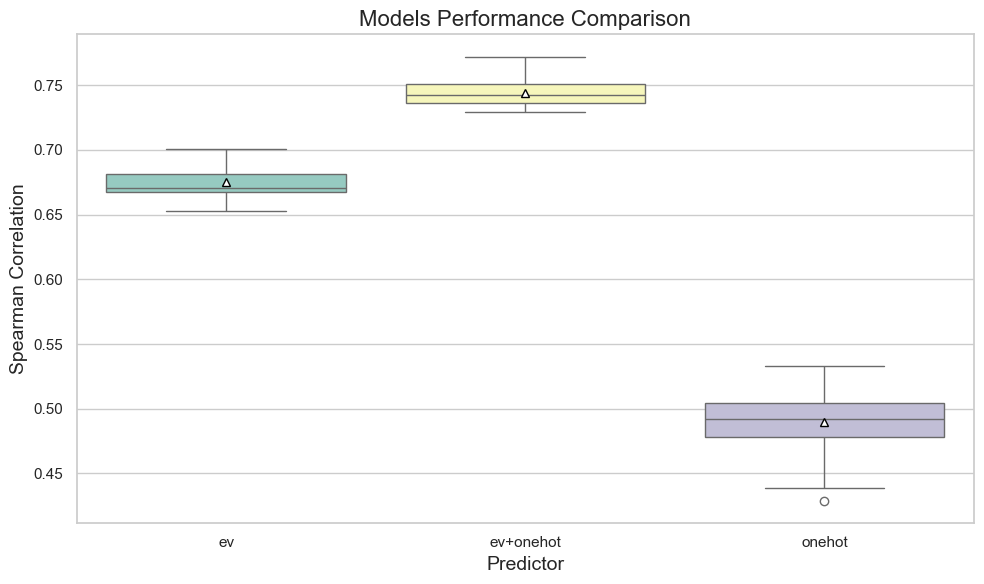

In [21]:
concatenated_df = pd.concat([ev_msa_only, ev_augmented, non_augmented_linear])


# Beautiful Box Plot

sns.set(style = "whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize = (10, 6))
sns.boxplot(data = concatenated_df, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize = 14)
plt.ylabel('Spearman Correlation', fontsize = 14)
plt.title('Models Performance Comparison', fontsize = 16)
plt.tight_layout()
#plt.savefig('plots/model_comparison.png')
plt.show()

#### With 28 training points

/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/3566475357.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = concatenated_df28, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})
/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/3566475357.py:10: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data = concatenated_df28, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})


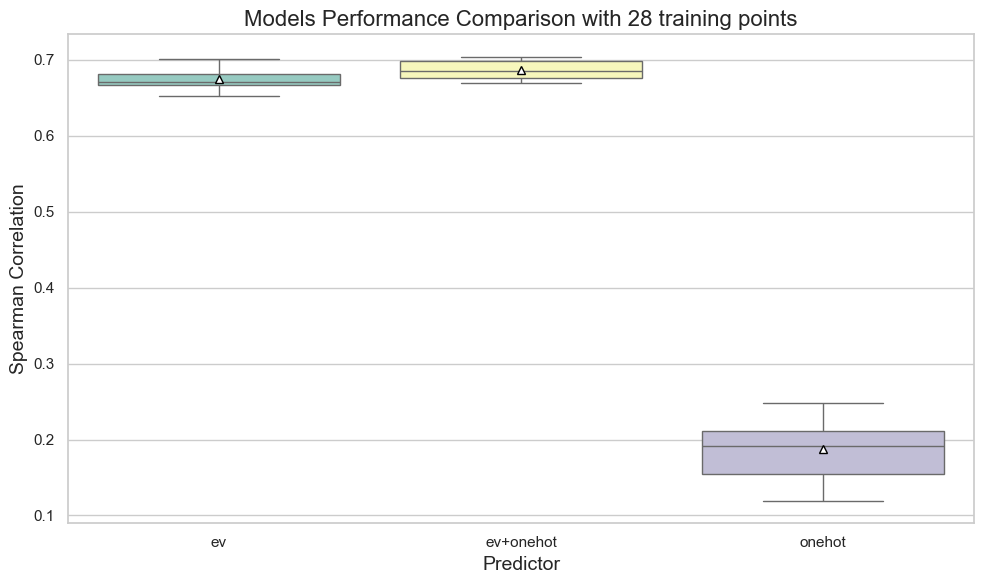

In [24]:
concatenated_df28 = pd.concat([ev_msa_only28, ev_augmented28, non_augmented_linear28])


# Beautiful Box Plot

sns.set(style = "whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize = (10, 6))
sns.boxplot(data = concatenated_df28, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize = 14)
plt.ylabel('Spearman Correlation', fontsize = 14)
plt.title('Models Performance Comparison with 28 training points', fontsize = 16)
plt.tight_layout()
plt.savefig('plots/model_comparison28.png')
plt.show()

#### Subsample 35, 28 training points

/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/1909652742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = concatenated_df35, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})
/var/folders/tp/ncf811k96mv0r_6b8tn9rw340000gn/T/ipykernel_80079/1909652742.py:10: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data = concatenated_df35, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})


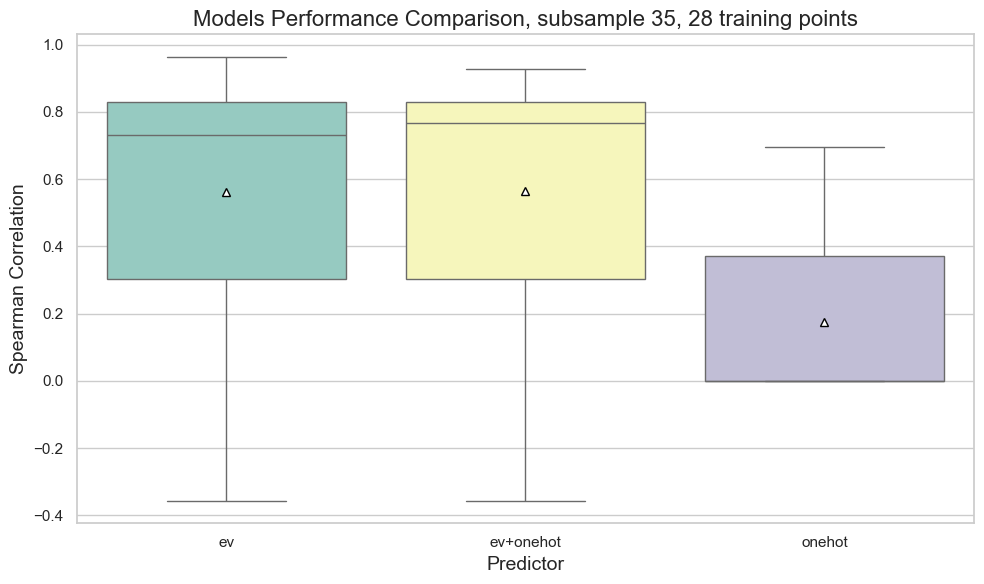

In [26]:
concatenated_df35 = pd.concat([ev_msa_only35, ev_augmented35, non_augmented_linear35])


# Beautiful Box Plot

sns.set(style = "whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize = (10, 6))
sns.boxplot(data = concatenated_df35, x = "predictor", y = "spearman", palette = palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize = 14)
plt.ylabel('Spearman Correlation', fontsize = 14)
plt.title('Models Performance Comparison, subsample 35, 28 training points', fontsize = 16)
plt.tight_layout()
plt.savefig('plots/model_comparison35.png')
plt.show()